In [24]:
import pandas as pd

import numpy as np

import seaborn as sns
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

In [3]:
dataset = pd.read_excel('./9._offline_total.xlsx')

## 시간대 변수 정의 
## 결제시간 앞 2자리 
dataset['시간'] = dataset['결제시간'].str.slice(0, 2)

## 결제일 데이트타임화 변환 
dataset['결제일'] = pd.to_datetime(dataset['결제일'])

## 결제월 변수 추가 
dataset['결제월'] = dataset['결제일'].map(lambda x : x.month)

## 결제연도 변수 추가
dataset['결제년'] = dataset['결제일'].map(lambda x : x.year)

dataset['결제년월'] = dataset['결제일'].map(lambda x: str(x)[:7])

## 결제요일
dataset['요일'] = dataset['결제일'].map(lambda x: x.dayofweek)

In [62]:
dataset.shape

(145010, 29)

### 일자별 판매량

(array([738215., 738276., 738337., 738399., 738460., 738521., 738580.,
        738641.]),
 <a list of 8 Text xticklabel objects>)

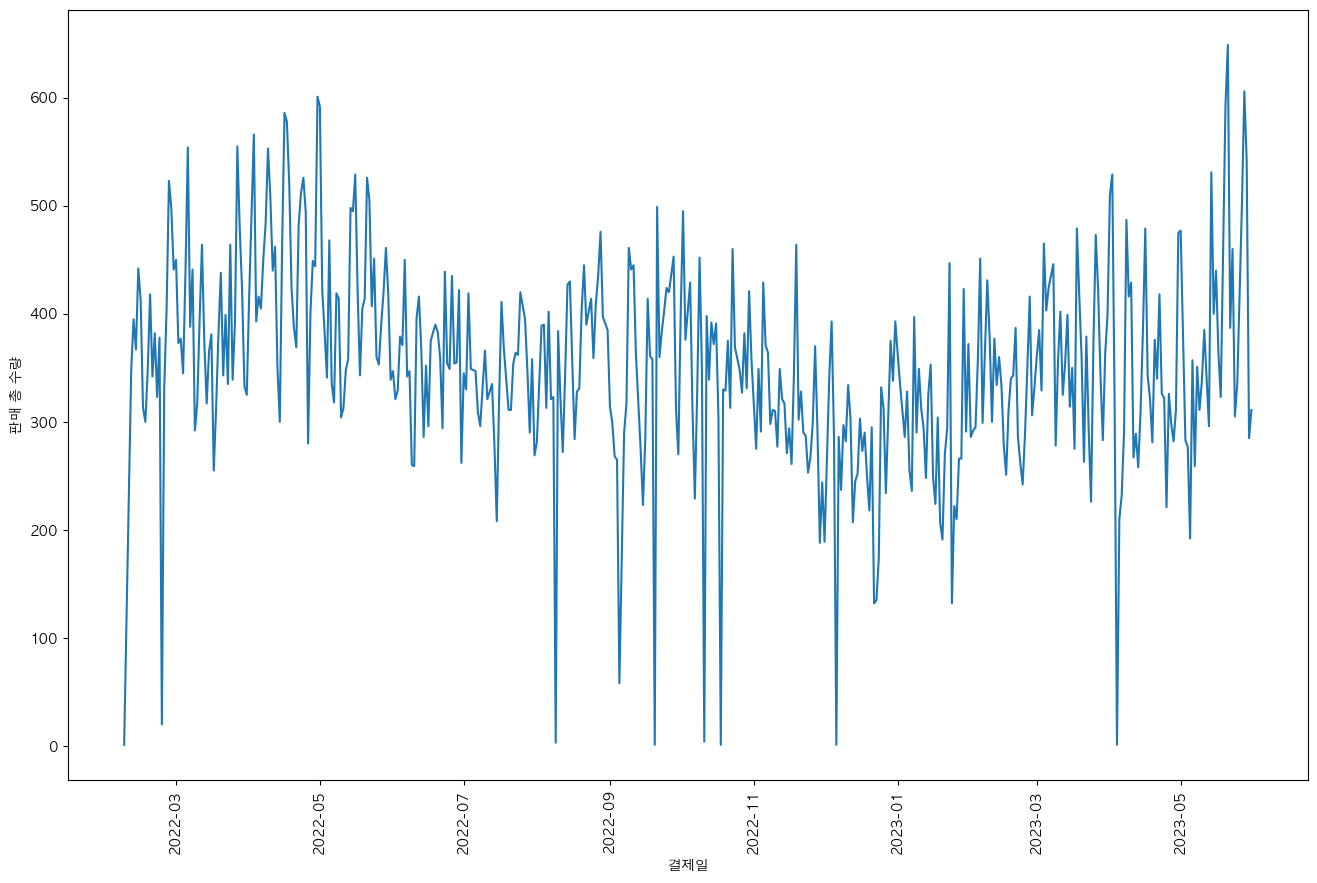

In [44]:
tmp = dataset[['결제일', '수량']].groupby(['결제일']).sum().reset_index().rename(columns = {'수량' : '판매 총 수량'})
plt.figure(figsize= (16, 10))
sns.lineplot(data = tmp, x = '결제일', y = '판매 총 수량')
plt.xticks(rotation = 90)

22.03~23.06 사이의 기간동안의 일자별 판매량을 보면 판매량의 추이를 확인할 수 있습니다. 특정한 주기나 패턴이 관측되지는 않습니다. 하지만 학교의 학기 기간동안(3-6, 9-11) 일부 높은 판매량이 관측되는 것을 관측할 수 있습니다.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

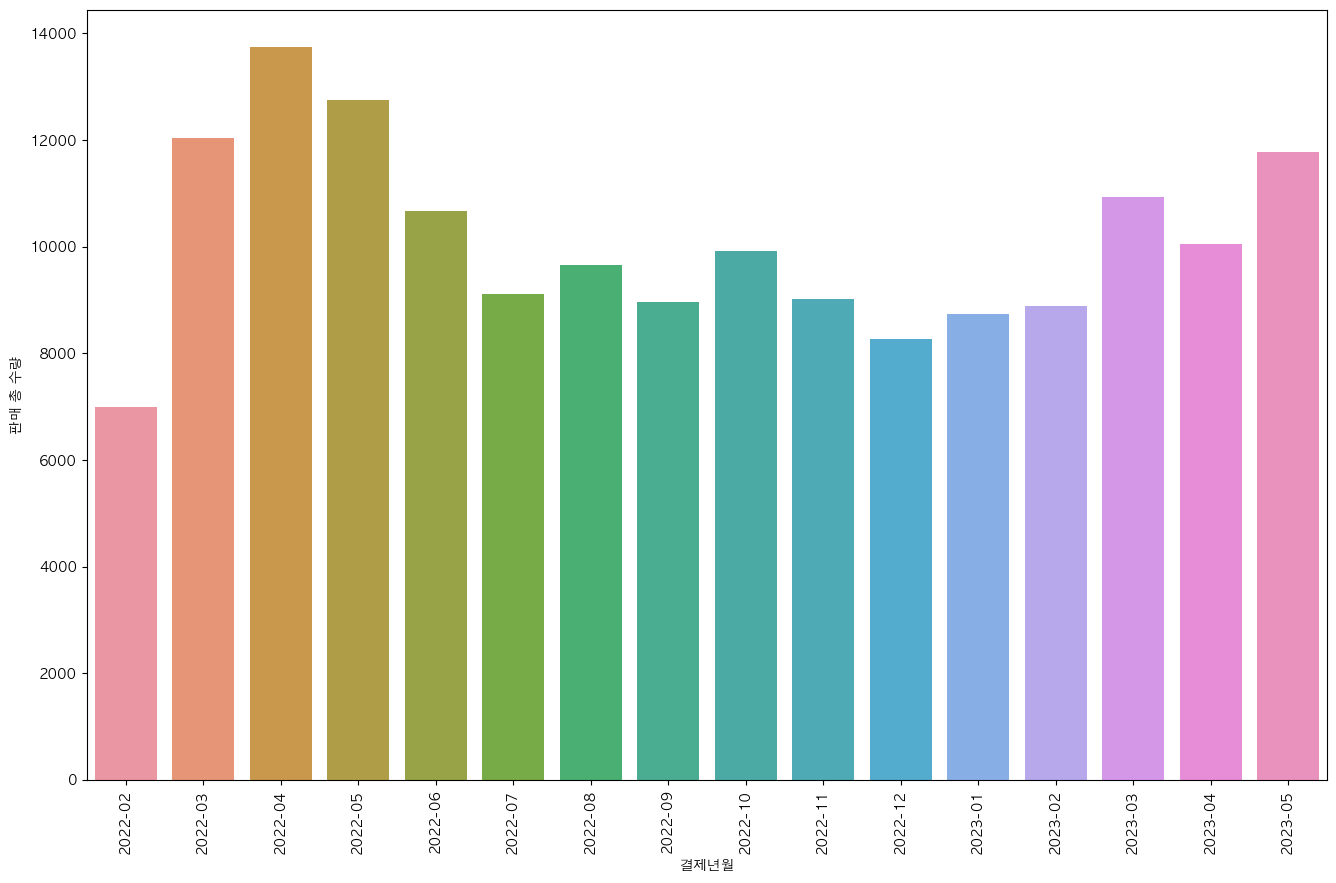

In [65]:
tmp = dataset[['결제년월', '수량']].groupby(['결제년월']).sum().reset_index().rename(columns = {'수량' : '판매 총 수량'})
plt.figure(figsize= (16, 10))
sns.barplot(data = tmp, x = '결제년월', y = '판매 총 수량')
plt.xticks(rotation = 90)

3/4/5월에 주로 많이 판매되는 물건으로 보여집니다.

### 카테고리별 판매량

In [71]:
tmp_df = dataset[['결제년월', '카테고리', '수량']].groupby(['결제년월', '카테고리']).sum().reset_index().rename(columns = {'수량' : '판매 총 수량'})

In [79]:
tmp_df.groupby(['카테고리']).sum().sort_values('판매 총 수량', ascending = False)

,판매 총 수량
카테고리,
시그니처,47443
Basic _ ice,23887
디저트,15749
Basic,15395
에스프레소,13928
비버리지,12072
핸드드립,10683
드립백/캡슐,8827
블렌딩원두,4556


카테고리별 판매량을 보면, 시그니처 > ice > 디저트 > Basic > 에스프레소 > 비버리지 순으로 판매되고 있습니다. 여기서 Basic과 얼음을 제외한
시그니처, 디저트, 에스프레소, 비버리지, 핸드드립, 드립백/캡슐, 원두(블렌딩, 싱글) 판매량의 추이만 살펴보고자 합니다.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

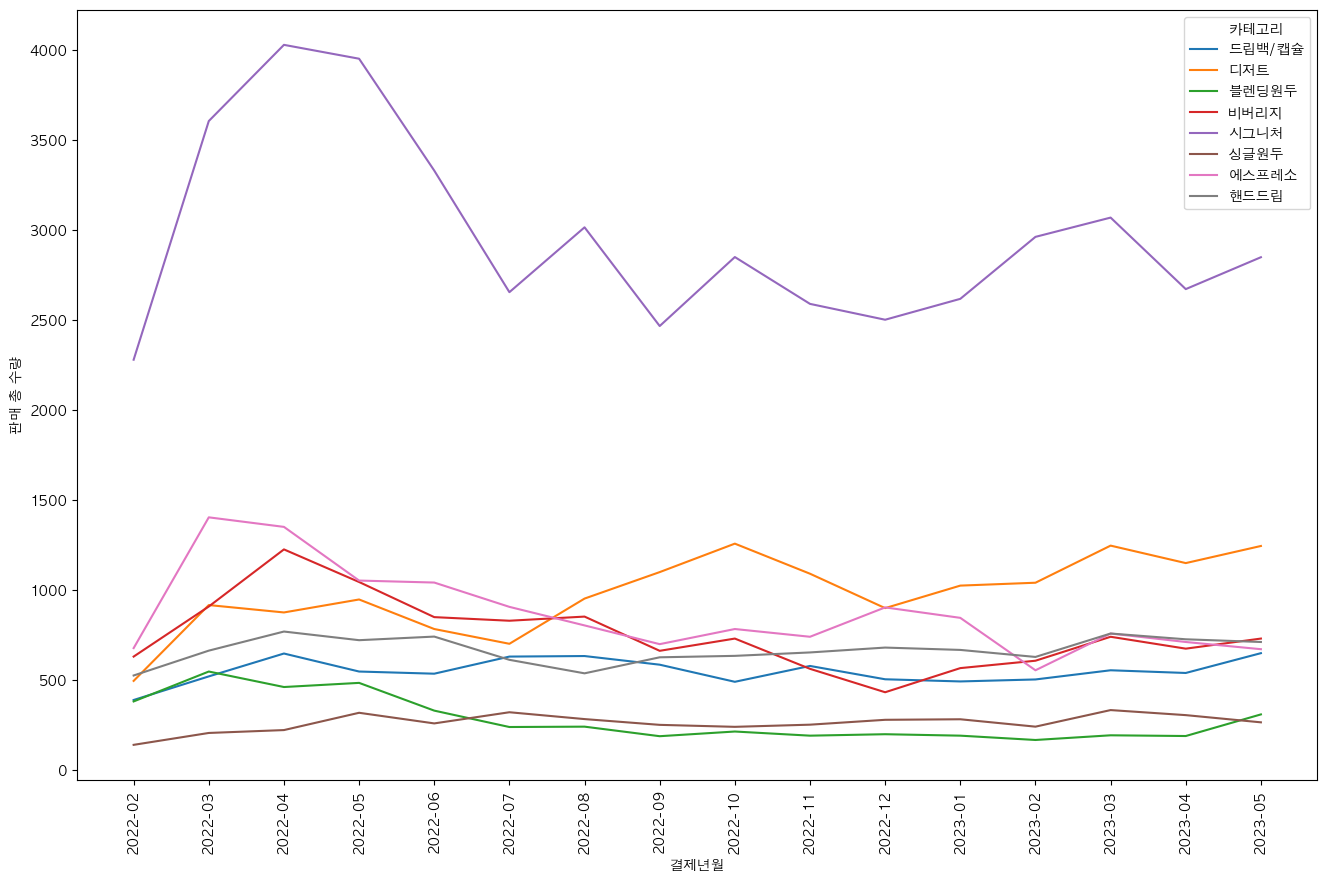

In [83]:
tmp_cat_select = tmp_df[tmp_df['카테고리'].isin(['시그니처', '디저트', '에스프레소', '비버리지', 
                                             '핸드드립', '드립백/캡슐', '블렌딩원두', '싱글원두'])]

plt.figure(figsize= (16, 10))
sns.lineplot(data = tmp_cat_select, x = '결제년월', y = '판매 총 수량', hue = '카테고리')
plt.xticks(rotation = 90)

오픈 초기 시그니처 상품의 판매량이 급증하였다가, 안정화된 것을 확인할 수 있습니다. 반면 음료(비버리지), 에스프레소, 블렌딩 원두의 판매량은 하향 추세입니다. 반면 디저트 부분의 판매량은 꾸준히 상승하는 것을 확인할 수 있습니다.

### 시간대별 판매수량

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

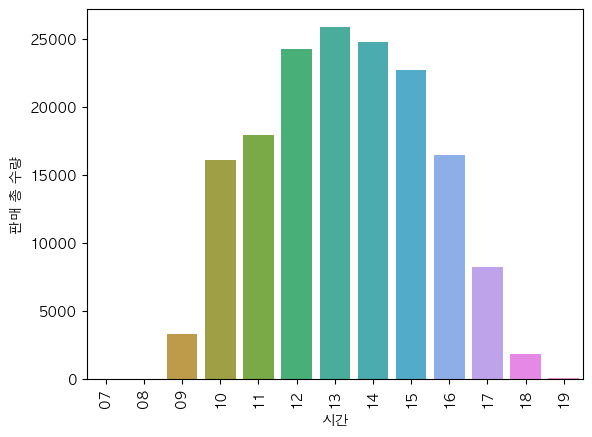

In [84]:
tmp = dataset[['시간', '수량']].groupby(['시간']).sum().reset_index().rename(columns = {'수량' : '판매 총 수량'})

sns.barplot(data = tmp, x = '시간', y = '판매 총 수량')
plt.xticks(rotation = 90)

### 요일별 판매량

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

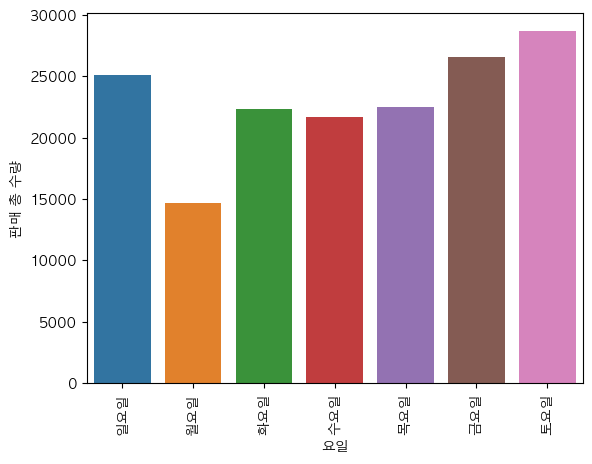

In [91]:
tmp = dataset[['요일', '수량']].groupby(['요일']).sum().reset_index().rename(columns = {'수량' : '판매 총 수량'})
tmp = tmp.replace({0 : '일요일', 1 : '월요일', 2 : '화요일', 3 : '수요일', 4 : '목요일', 5 : '금요일', 6 : '토요일'})


sns.barplot(data = tmp, x = '요일', y = '판매 총 수량')
plt.xticks(rotation = 90)

판매량은 주로 금토일 주말에 몰려 있습니다. 월요일에 상대적으로 판매량이 저조한 것을 바탕으로 휴일을 정할 수도 있을 것 같네요.